<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# models.Sequential()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ="relu", input_shape=(28,28,1))) #3x3 필터 32개,흑백
model.add(layers.MaxPooling2D((2,2))) #풀링은 세로 가로 방향의 공간을 줄이는 연산(반으로 줄어듬)
model.add(layers.Conv2D(64, (3,3), activation ="relu")) 
model.add(layers.MaxPooling2D((2,2))) 
model.add(layers.Conv2D(64,(3,3), activation="relu"))

In [ ]:
model.summary()

# 파라미터의 개수: 55,744개
# 28x28  -> 26x26 => padding을 하지 않아서
# conv층 다음은 flatten과정을 거침(완전연결층)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

# Conv층 => 다 펴줌
# Conv층을 안거치면 공간정보를 학습할 수 없다.
# 완전연결층을 거쳐야 함

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
---------------------------------------------------

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 5ms/step - loss: 0.1765 - accuracy: 0.9452
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0471 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0253 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0193 - accuracy: 0.9942


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9908


In [ ]:
test_acc

0.9908000230789185

In [ ]:
----------------------------------------

In [ ]:
# 강아지 고양이 

In [ ]:
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"jihyeonlim","key":"5b57f75e79036f072ed93098d79c9801"}'}

In [ ]:
!mkdir~/.kaggle
!cp kaggle.json~/.kaggle/
!cpmod 600 ~/.kaggle/kaggle.json

/bin/bash: mkdir~/.kaggle: No such file or directory
cp: missing destination file operand after 'kaggle.json~/.kaggle/'
Try 'cp --help' for more information.
/bin/bash: cpmod: command not found


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 63.3MB/s]
100% 812M/812M [00:09<00:00, 91.1MB/s]


In [ ]:
/content/dogs-vs-cats.zip

In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
# 8-6 이미지를 훈련, 검증, 테스트 디렉터리로 복사하기
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileNotFoundError: ignored

In [ ]:
# 모델만들기

In [ ]:
# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

NameError: ignored

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [ ]:
# 8-8 모델 훈련 설정하기
from tensorflow.python import metrics
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=['accuracy'])

In [ ]:
# 데이터 전처리
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_datset:
  print('데이터 배치 크기:', data_batch.shape)
  print('레이블 배치 크기:', labels_batch.shape)
  break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/30
63/63 [==============================] - 9s 93ms/step - loss: 0.7356 - accuracy: 0.5070 - val_loss: 0.6915 - val_accuracy: 0.5320
Epoch 2/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6949 - accuracy: 0.5350 - val_loss: 0.8420 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 5s 73ms/step - loss: 0.7016 - accuracy: 0.5775 - val_loss: 0.6701 - val_accuracy: 0.5860
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6653 - accuracy: 0.6485 - val_loss: 0.6233 - val_accuracy: 0.6550
Epoch 5/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6058 - accuracy: 0.6890 - val_loss: 0.8106 - val_accuracy: 0.5870
Epoch 6/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5671 - accuracy: 0.7210 - val_loss: 0.6622 - val_accuracy: 0.6640
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5382 - accuracy: 0.7285 - val_loss: 0.7723 - val_accuracy: 0.6150
Epoch 8/30
63

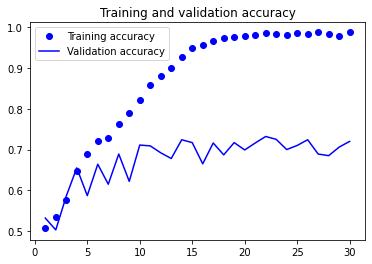

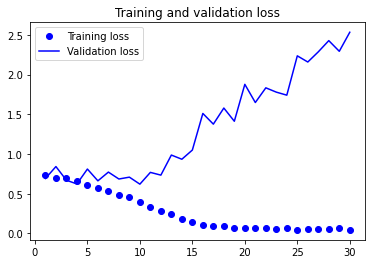

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.6367 - accuracy: 0.6920
Test accuracy: 0.692


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

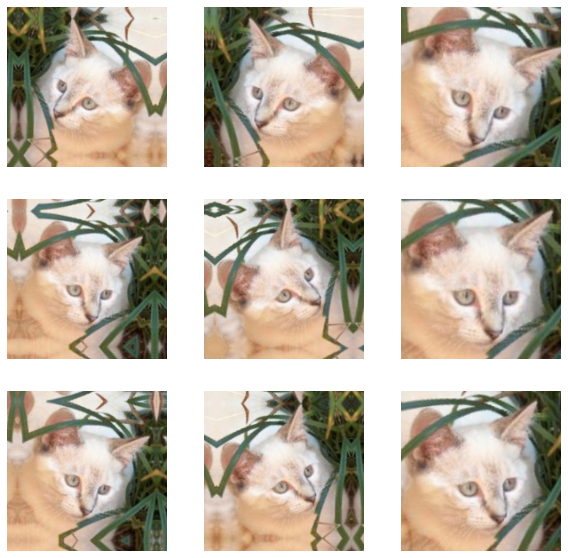

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
--------------------------------------------------------

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ="relu", input_shape=(28,28,1))) #3x3 필터 32개,흑백
model.add(layers.MaxPooling2D((2,2))) #풀링은 세로 가로 방향의 공간을 줄이는 연산(반으로 줄어듬)
model.add(layers.Conv2D(64, (3,3), activation ="relu")) 
model.add(layers.MaxPooling2D((2,2))) 
model.add(layers.Conv2D(64,(3,3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.1670 - accuracy: 0.9476
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0322 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0193 - accuracy: 0.9940


In [ ]:
-----------------------------------------------------------------------------------------------------------

CNN

완전 연결 네트워크의 문제점으로부터 시작

- 매개변수의 폭발적인 증가
- 공간 추론의 부족
 - 픽셀 사이의 근접성 개념이 완전 연결 계층에서는 손실됨
- 합성곱 계층은 입력 이미지가 커져도 튜닝해야 할 매개변수 개수에 영향을 주지 않음
- 또한 그 어떠한 이미지에도 그 차원 수와 상관없이 적용될 수 있음

https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4

컨볼루션 연산
- 필터 연산
 - 입력 데이터에 필터를 통한 어떠한 연산을 진행
 - 필터에 대응하는 원소끼리 곱하고 그 합을 구함
 - 연산이 완료된 결과 데이터를 특징 맵이라 부름
- 필터
 - 커널이라고도 하며 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념
 - 필터의 사이즈는 '거의 항상 홀수'
  - 짝수이면 패딩이 비대칭이 되어버림
  - 왼쪽, 오른쪽을 다르게 주어야함
  - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재
 - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정, 따라서 과적합을 방지할 수 있음

An example of convolution operation  

https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524

- 일반적으로 합성곱 연산을 한 후의 데이터 사이즈는 (n - f + 1) x (n - f + 1)

- 패딩과 스트라이드
 - 필터(커널) 사이즈와 함께 입력 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
 - 사용자가 결정할 수 있음
 - 패딩은 입력 데이터의 주변을 특정 값으로 채우는 기법. 주로 0으로 많이 채움
 - 출력 데이터의 크기 : (n + 2p - f +1) x (n + 2p -f + 1)
 - valid(패딩을 주지 않음) 와 same(패딩을 주어 입력 이미지와 연산 후의 이미지가 같게 함), 패딩의 크기는 (k-1)/2 (단, stride=1)
 - 스트라이드는 필터를 적용하는 간격을 의미

 https://kingnamji.tistory.com/24

 https://m.blog.naver.com/jevida/221841296542

풀링(Pooling)
- 필터 사이즈 내에서 특정 값을 추출하는 과정
- Max Pooling : 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
- 특징맵의 크기를 절반으로 줄임
- 모델이 물체의 주요한 특성을 학습하도록 해주며 컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
- 모델의 파라미터 개수를 줄여주고 연산 속도를 빠르게 해줌

https://cs231n.github.io/convolutional-networks/

LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델 
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet


- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스

Visual Geometry Group Net(VGGNet)
- 활성화 함수로 ReLU 사용, Dropout 적용
- 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
- 인위적으로 데이터셋을 늘림
 - 이미지 변환, 좌우 반전 등의 변환을 시도
- 몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성
- 모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용<br>
https://buomsoo-kim.github.io/keras/2018/05/02/Easy-deep-learning-with-Keras-8.md/ <br>
- 합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용
- 특성맵 깊이를 증가 시킴
- 척도 변경을 통한 데이터 보강(Data Augmentation)
- 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
- 11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
- 이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴
- VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

- LeNet-5, AlexNet, VGG-16, ResNet, Inception Network  
https://wooono.tistory.com/233


In [ ]:
from tensorflow.keras.applications import VGG16
vgg_net = VGG16(include_top=True, weights='imagenet',
                input_tensor=None, input_shape=None,
                pooling=None, classes=1000)

In [ ]:
vgg_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.applications import VGG19
vgg_net = VGG19(include_top=True, weights='imagenet',
                input_tensor=None, input_shape=None,
                pooling=None, classes=1000)


574710816/574710816 [==============================] - 9s 0us/step


In [ ]:
vgg_net.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

GoogLeNet, Inception 모듈
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네트워크라고도 불림
- Inception Module은 layer에 1x1 Convolution layer를 추가해 bottleneck layer를 구현함으로써, channel 수를 감소시키며, 연산량을 줄이는 구조입니다.
이것이 inception module의 기본 아이디어이며, Inception Network는 이러한 Inception Module의 집합입니다.


# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림


  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

  <sub>[이미지 출처] https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5</sub>


- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>


In [ ]:
import tensorflow as tf

In [ ]:
inception3_net = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet',
                                                   input_shape=None, pooling=None, classes=1000)

96112376/96112376 [==============================] - 3s 0us/step


In [ ]:
inception3_net.summary()

# 9개의 블럭으로 구성이 되어있다.
# 파라미터 수: 23,851,784

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

# ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음


<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet50 = tf.keras.applications.ResNet50(
    include_top = True, weights='imagenet',
    input_tensor = None, input_shape = None,
    pooling = None, classes=1000
)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
resnet50.summary()

# 파라미터 : 25,636,712개

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           